In [1]:
import sys
sys.path.append('..')
import h5py
import yaml
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../flowrec/utils/a4.mplstyle')

from pathlib import Path
from mpl_toolkits.axes_grid1 import ImageGrid

from flowrec.utils import my_discrete_cmap

In [2]:
results_dir = Path('../local_results/2dkol/reduce_observations')

In [3]:
def is_experiment_input(name):
    if 'min_input' in name:
        return True
    else:
        return False
def is_experiment_sensors(name):
    if 'min_sensor' in name:
        return True
    else:
        return False

# Changing number of input

In [4]:
def get_results_inputs(folder):
    d = Path(results_dir,folder)
    with h5py.File(Path(d,'summary.h5')) as hf:
        names = np.array(hf.get('runs_name')).astype('unicode')
        l_train = np.array(hf.get('runs_loss_train'))
        # l_val = np.array(hf.get('runs_loss_val'))

    num_input = []
    loss_total = []
    loss_rel = []
    for i in range(len(names)):
        if is_experiment_input(names[i]):
            name_split = names[i].split('-')
            num_input.append(int(name_split[-2]))
            loss_total.append(np.sum(l_train[i,1:]))
            loss_rel.append(l_train[i,0])
    
    num_input = np.array(num_input)
    loss_total = np.array(loss_total)
    loss_rel = np.array(loss_rel)
    
    _sort_idx = np.argsort(num_input)
    num_input = num_input[_sort_idx]
    loss_total = loss_total[_sort_idx]
    loss_rel = loss_rel[_sort_idx]

    return num_input, loss_total, loss_rel

In [5]:
num_input_classic, l_in_total_classic, l_in_classic = get_results_inputs('classic')
num_input_3, l_in_total_3, l_in_3 = get_results_inputs('loss3')
num_input_mean3, l_in_total_mean3, l_in_mean3 = get_results_inputs('mean3')

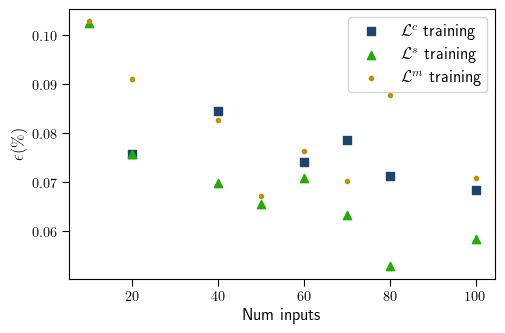

In [6]:
# plot relative loss
plt.figure(figsize=(5.5,3.5))
ax = plt.subplot(111)

ax.scatter(num_input_classic, l_in_classic, label='$\mathcal{L}^c$ training',marker='s', color=my_discrete_cmap(0))
ax.scatter(num_input_3, l_in_3, label='$\mathcal{L}^s$ training',marker='^', color=my_discrete_cmap(1))
ax.scatter(num_input_mean3, l_in_mean3, label='$\mathcal{L}^m$ training',marker='.', color=my_discrete_cmap(2))
ax.legend()
ax.set(ylabel='$\epsilon (\%)$', xlabel='Num inputs')
plt.show()

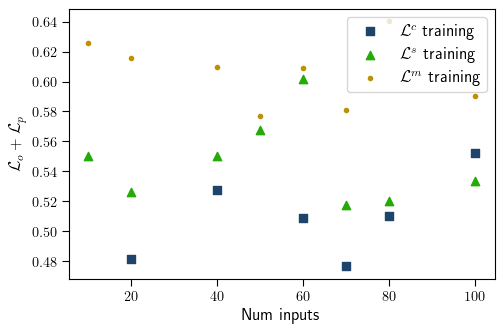

In [7]:
# plot total loss (unweighted)
plt.figure(figsize=(5.5,3.5))
ax = plt.subplot(111)

ax.scatter(num_input_classic, l_in_total_classic, label='$\mathcal{L}^c$ training',marker='s', color=my_discrete_cmap(0))
ax.scatter(num_input_3, l_in_total_3, label='$\mathcal{L}^s$ training',marker='^', color=my_discrete_cmap(1))
ax.scatter(num_input_mean3, l_in_total_mean3, label='$\mathcal{L}^m$ training',marker='.', color=my_discrete_cmap(2))
ax.legend()
ax.set(ylabel='$\mathcal{L}_o + \mathcal{L}_p$', xlabel='Num inputs')
plt.show()

Conclusion: use 80 input sensors

# Changing number of sensors

In [8]:
def get_results_sensors(folder):
    d = Path(results_dir,folder)
    with h5py.File(Path(d,'summary.h5')) as hf:
        names = np.array(hf.get('runs_name')).astype('unicode')
        l_train = np.array(hf.get('runs_loss_train'))
        # l_val = np.array(hf.get('runs_loss_val'))

    num_sensors = []
    loss_total = []
    loss_rel = []
    for i in range(len(names)):
        if is_experiment_sensors(names[i]):
            name_split = names[i].split('-')
            num_sensors.append(int(name_split[-1]))
            loss_total.append(np.sum(l_train[i,1:]))
            loss_rel.append(l_train[i,0])
    
    num_sensors = np.array(num_sensors)
    loss_total = np.array(loss_total)
    loss_rel = np.array(loss_rel)
    
    _sort_idx = np.argsort(num_sensors)
    num_sensors = num_sensors[_sort_idx]
    loss_total = loss_total[_sort_idx]
    loss_rel = loss_rel[_sort_idx]

    return num_sensors, loss_total, loss_rel

In [9]:
num_sensors_classic, l_se_total_classic, l_se_classic = get_results_sensors('classic')
num_sensors_3, l_se_total_3, l_se_3 = get_results_sensors('loss3')
num_sensors_mean3, l_se_total_mean3, l_se_mean3 = get_results_sensors('mean3')

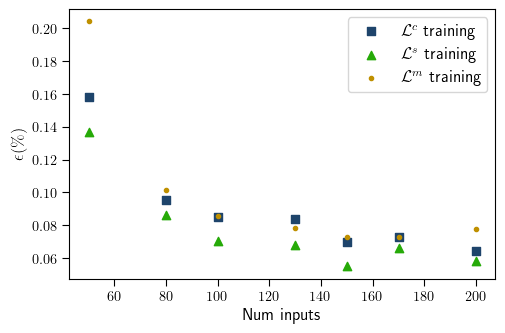

In [10]:
# plot relative loss
plt.figure(figsize=(5.5,3.5))
ax = plt.subplot(111)

ax.scatter(num_sensors_classic, l_se_classic, label='$\mathcal{L}^c$ training',marker='s', color=my_discrete_cmap(0))
ax.scatter(num_sensors_3, l_se_3, label='$\mathcal{L}^s$ training',marker='^', color=my_discrete_cmap(1))
ax.scatter(num_sensors_mean3, l_se_mean3, label='$\mathcal{L}^m$ training',marker='.', color=my_discrete_cmap(2))
ax.legend()
ax.set(ylabel='$\epsilon (\%)$', xlabel='Num inputs')
plt.show()

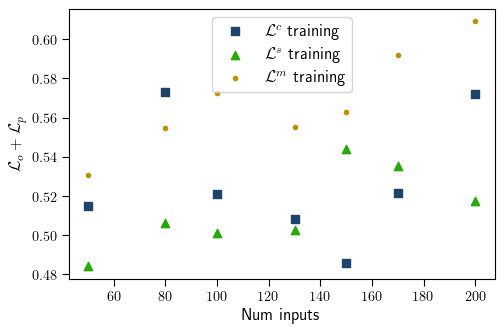

In [11]:
# plot total loss (unweighted)
plt.figure(figsize=(5.5,3.5))
ax = plt.subplot(111)

ax.scatter(num_sensors_classic, l_se_total_classic, label='$\mathcal{L}^c$ training',marker='s', color=my_discrete_cmap(0))
ax.scatter(num_sensors_3, l_se_total_3, label='$\mathcal{L}^s$ training',marker='^', color=my_discrete_cmap(1))
ax.scatter(num_sensors_mean3, l_se_total_mean3, label='$\mathcal{L}^m$ training',marker='.', color=my_discrete_cmap(2))
ax.legend()
ax.set(ylabel='$\mathcal{L}_o + \mathcal{L}_p$', xlabel='Num inputs')
plt.show()

Conclusion: 150 sensors

# Correlation of all runs

In [12]:
def get_results_all(folder):
    d = Path(results_dir,folder)
    with h5py.File(Path(d,'summary.h5')) as hf:
        l_train = np.array(hf.get('runs_loss_train'))
        # l_val = np.array(hf.get('runs_loss_val'))

    loss_total = np.sum(l_train[:,1:],axis=1)
    loss_rel = l_train[:,0]

    return loss_total, loss_rel

In [13]:
l_total_classic, l_classic = get_results_all('classic')
l_total_3, l_3 = get_results_all('loss3')
l_total_mean3, l_mean3 = get_results_all('mean3')

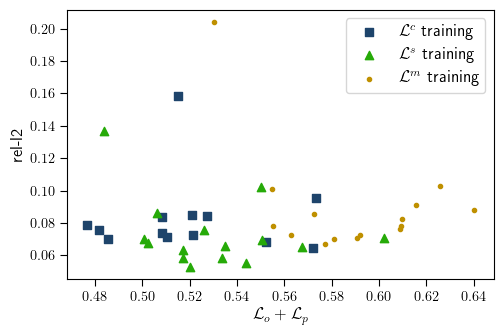

In [14]:
# Correlation of total and relaative loss
plt.figure(figsize=(5.5,3.5))
ax = plt.subplot(111)

ax.scatter(l_total_classic, l_classic, label='$\mathcal{L}^c$ training',marker='s', color=my_discrete_cmap(0))
ax.scatter(l_total_3, l_3, label='$\mathcal{L}^s$ training',marker='^', color=my_discrete_cmap(1))
ax.scatter(l_total_mean3, l_mean3, label='$\mathcal{L}^m$ training',marker='.', color=my_discrete_cmap(2))
ax.legend()
ax.set(xlabel='$\mathcal{L}_o + \mathcal{L}_p$', ylabel='rel-l2')
plt.show()

# Plots for paper
left: hold number of sensors constant at 200, right: hold number of inputs at 80

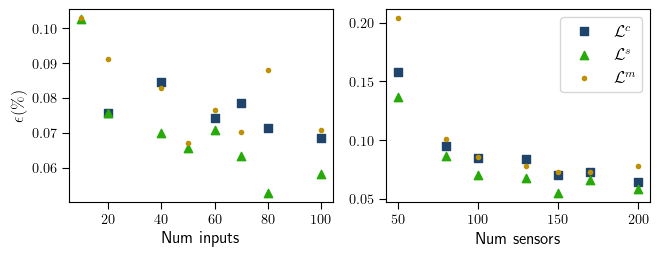

In [17]:
# plot relative loss
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(7.5,2.5))

ax0.scatter(num_input_classic, l_in_classic, label='$\mathcal{L}^c$',marker='s', color=my_discrete_cmap(0))
ax0.scatter(num_input_3, l_in_3, label='$\mathcal{L}^s$',marker='^', color=my_discrete_cmap(1))
ax0.scatter(num_input_mean3, l_in_mean3, label='$\mathcal{L}^m$',marker='.', color=my_discrete_cmap(2))
ax0.set(ylabel='$\epsilon (\%)$', xlabel='Num inputs')

ax1.scatter(num_sensors_classic, l_se_classic, label='$\mathcal{L}^c$',marker='s', color=my_discrete_cmap(0))
ax1.scatter(num_sensors_3, l_se_3, label='$\mathcal{L}^s$',marker='^', color=my_discrete_cmap(1))
ax1.scatter(num_sensors_mean3, l_se_mean3, label='$\mathcal{L}^m$',marker='.', color=my_discrete_cmap(2))
ax1.legend()
ax1.set(xlabel='Num sensors')
# fig.savefig('./figs/2dkol_grid_sensitivity')
plt.show()